In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Data Analytics/Tugas 1/dataset - 2020-09-24.csv'))

#**Data Understanding**

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

#**Data analysis on EPL Top Scorers in every age ranging from 18-25 Years Old**

In [ ]:
def top_scorers_18_to_25(df):
    # Filter players aged between 18 and 25
    filtered_df = df[(df['Age'] >= 18) & (df['Age'] <= 25)]

    # Group by age and player, and sum goals
    top_scorers = filtered_df.groupby(['Age', 'Name']).agg({'Goals': 'sum'}).reset_index()

    # Get the number one top scorer for each age group
    top_scorers = top_scorers.loc[top_scorers.groupby('Age')['Goals'].idxmax()]

    # Sort by age
    top_scorers = top_scorers.sort_values(by='Age')

    # Print player name, age, and goals
    print("Top Goal Scorer aged 18 to 25 for each age:")
    print(top_scorers[['Age', 'Name', 'Goals']])

    # Return top scorers as DataFrame (optional)
    return top_scorers

In [ ]:
top_scorer = top_scorers_18_to_25(df)

Top Goal Scorer aged 18 to 25 for each age:
      Age                Name  Goals
8    18.0     Mason Greenwood     10
25   19.0  Gabriel Martinelli      3
68   20.0          Phil Foden      7
93   21.0         Mason Mount      7
130  22.0     Marcus Rashford     44
157  23.0       Gabriel Jesus     42
196  24.0     Anthony Martial     51
261  25.0     Raheem Sterling     86


In [ ]:
import matplotlib.pyplot as plt

#**Histogram**

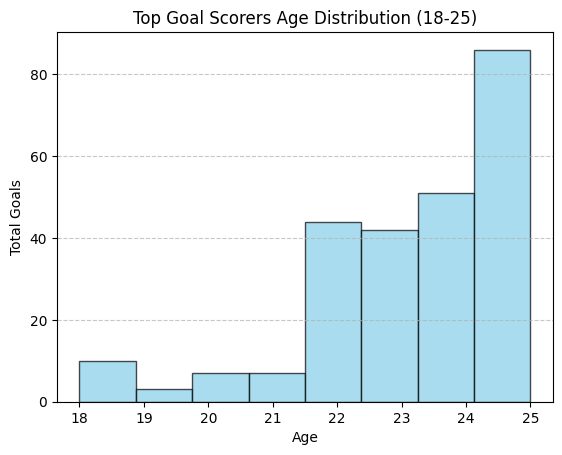

In [ ]:
plt.hist(top_scorer['Age'], weights=top_scorer['Goals'], bins=8, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Top Goal Scorers Age Distribution (18-25)')
plt.xlabel('Age')
plt.ylabel('Total Goals')
plt.xticks(range(18, 26))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#**BoxPlot**

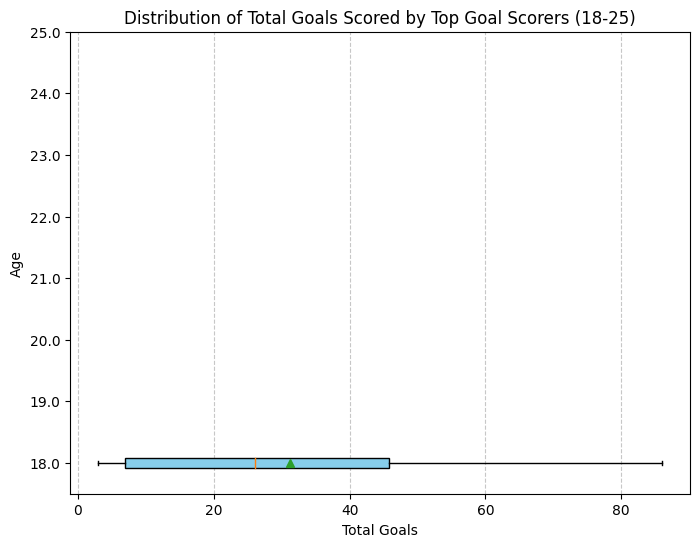

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(top_scorer['Goals'], vert=False, patch_artist=True, showmeans=True, boxprops=dict(facecolor='skyblue', color='black'), meanprops=dict(color='red'))
plt.title('Distribution of Total Goals Scored by Top Goal Scorers (18-25)')
plt.xlabel('Total Goals')
plt.ylabel('Age')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.yticks(range(1, len(top_scorer['Age']) + 1), top_scorer['Age'])
plt.show()

#**Correlation matrix on the age relative to the goals**

Correlation Matrix:
            Age     Goals
Age    1.000000  0.903503
Goals  0.903503  1.000000


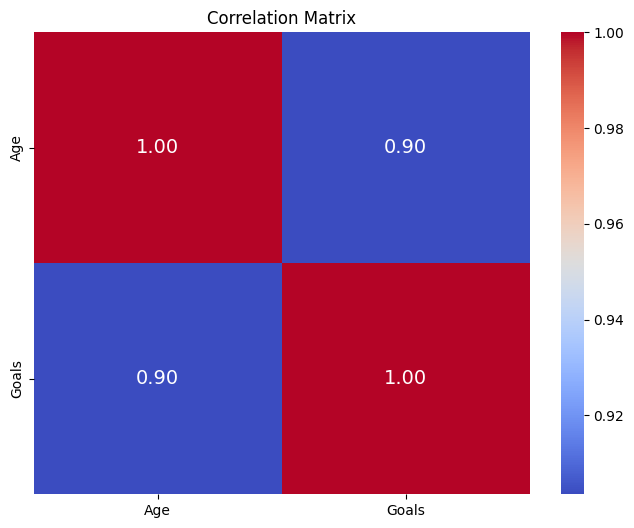

In [ ]:
import pandas as pd

# Assuming you have already calculated the top_scorer DataFrame
# top_scorer contains 'Age' and 'Goals' columns

# Create a DataFrame with 'Age' and 'Goals' columns
data = top_scorer[['Age', 'Goals']]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Optional: Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 14})
plt.title('Correlation Matrix')
plt.show()


#**Pie Chart**

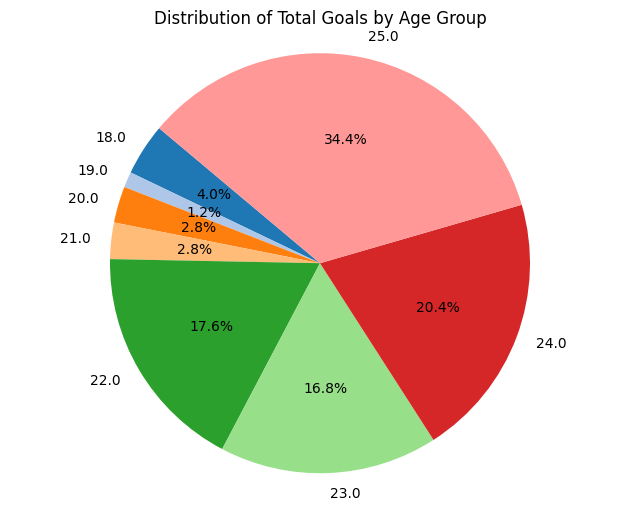

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already calculated the top_scorer DataFrame
# top_scorer contains 'Age' and 'Goals' columns

# Calculate total goals scored for each age group
total_goals_by_age = top_scorer.groupby('Age')['Goals'].sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(total_goals_by_age, labels=total_goals_by_age.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Total Goals by Age Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()